In [1]:
%matplotlib inline
import plot
import market
import metrics
from decimal import Decimal

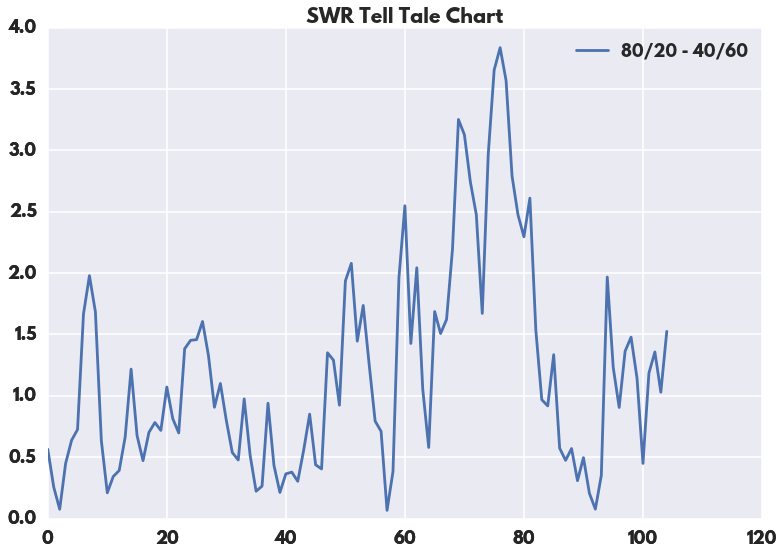

In [2]:
m = market.Returns_US_1871()
years = 30
start_year = 1871
last_year = 2015-years

def run(stock_pct):
    swrs = []
    for _ in range(last_year - start_year + 1):
        returns = []
        if start_year + _ in (1965,1966,1967,1968,1969): continue
        for one_year in zip(range(years), m.iter_from(start_year + _)):
            annual_returns = one_year[1]
            stocks = annual_returns.stocks - annual_returns.inflation
            bonds = annual_returns.bonds - annual_returns.inflation
            returns.append((stocks * stock_pct) + (bonds * (1-stock_pct)))
        swrs.append(float(metrics.ssr(returns)))
    return swrs

six = run(Decimal('.6'))
four = run(Decimal('.4'))
eight = run(Decimal('.8'))

diff = filter(lambda x: x>0, [(x[0] - x[1])*100 for x in zip(eight, four)])

#plot.plot_n({'80/20': eight, '40/60' : four}, '', 'Safe Withdrawal Rate by Year', add_commas=False)
plot.plot_n({'80/20 - 40/60' : list(diff)}, '', 'SWR Tell Tale Chart', add_commas=False, zero_based=False)